### 1. csv 파일 불러오기

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from deepchem.feat.molecule_featurizers import RDKitDescriptors
from rdkit import Chem
from rdkit.Chem import Descriptors
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
warnings.filterwarnings('ignore')           # 출력 창 경고 메시지 무시
plt.rcParams['axes.unicode_minus'] = False  # 음수부호 깨짐 관련
plt.rcParams['font.family'] = 'Malgun Gothic' # window 전용 한글 폰트 설정

In [3]:
train_df_proto = pd.read_csv('rdkit_train.csv')
test_df_proto = pd.read_csv('rdkit_test.csv')

### 2. 데이터 전처리

In [21]:
test_df_proto

,Smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_morpholine,fr_nitrile,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_thiazole
0,O=C(C1=CSC(C2=CC=CN=C2)=N1)NC3=CC(NC4CCN(C)CC4...,13.121525,13.121525,0.208147,-0.236941,0.481693,17.558824,477.634,446.386,477.219846,...,0,0,0,0,0,1,0,0,1,1
1,N#CC1=CC(C=C2)=C(C=C1)N2C(N=C3)=NC(NC4CCCCC4)=...,9.236981,9.236981,0.420655,0.420655,0.437543,17.457143,466.593,436.353,466.259343,...,0,1,0,0,0,1,0,0,0,0
2,N#CC(C=C1)=C(N[C@@H]2CCNC2)C=C1NC(N=C3)=NC=C3C...,9.421735,9.421735,0.332235,0.332235,0.484605,20.483871,415.505,390.305,415.223292,...,0,1,0,0,0,0,0,0,0,0
3,N#CC(C=C1)=CC=C1NC(N=C2)=NC(NC3CC(NC(C=C)=O)CC...,11.749881,11.749881,0.097965,-0.150181,0.398314,19.648649,498.591,468.351,498.249172,...,0,1,0,0,0,0,0,0,0,0
4,N#CC(C=C1)=CC=C1NC(N=C2)=NC(NC3CC(N)CC3)=C2C(C...,9.007353,9.007353,0.222502,0.222502,0.526311,20.969697,444.543,416.319,444.238608,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,N#CC1=CC(C=C2)=C(C=C1)N2C(N=C3)=NC(N4CCOCC4)=C...,9.218043,9.218043,0.422749,0.422749,0.506391,17.205882,454.538,428.330,454.222957,...,1,1,0,0,0,1,0,0,0,0
109,O=C(C1=CSC(C2=CC=NC=C2)=N1)NC3=CC(NC4CCN(C(C)C...,13.397071,13.397071,0.009681,-0.228398,0.361473,17.150000,561.756,522.444,561.288594,...,0,0,0,0,0,2,0,0,1,1
110,N#Cc1ccc(Nc2ncc(cn2)c3cnn(c3)C4CCNCC4)cc1N[C@@...,9.435997,9.435997,0.332104,0.332104,0.472711,18.906250,429.532,402.316,429.238942,...,0,1,0,0,0,1,0,0,0,0
111,O=C(C)N(CC1)CCC1N2N=CC(C3=CN=C(N4C(C=CC(C#N)=C...,11.520042,11.520042,0.136868,0.136868,0.515486,14.645161,411.469,390.301,411.180758,...,0,1,0,0,0,1,0,0,0,0


In [22]:
df = train_df_proto.drop(columns=['Smiles'])

In [23]:
df

,pIC50,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.66,14.635817,14.635817,0.021978,-0.828882,0.059187,20.597222,995.188,924.628,994.516405,...,1,1,0,0,0,0,0,0,0,0
1,10.59,14.673248,14.673248,0.205025,-1.585128,0.479279,19.333333,535.624,501.352,535.270716,...,0,0,0,0,0,0,0,0,0,0
2,10.11,14.663674,14.663674,0.195978,-1.596212,0.466884,19.333333,537.596,505.340,537.249981,...,0,0,0,0,0,0,0,0,0,0
3,10.09,14.610375,14.610375,0.119300,-2.432700,0.448013,17.256410,545.566,515.326,545.236222,...,0,0,0,0,0,0,0,0,0,0
4,10.00,14.011531,14.011531,0.000644,-0.859426,0.045219,17.373134,936.189,870.669,935.461533,...,1,1,0,0,0,0,1,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,4.52,12.044186,12.044186,0.147374,-0.555627,0.563801,10.476190,283.247,274.175,283.070539,...,0,1,0,0,0,0,0,0,0,0
1948,4.52,12.446045,12.446045,0.207820,-0.207820,0.735215,10.869565,327.815,309.671,327.113840,...,0,0,0,0,0,0,0,0,1,0
1949,4.52,13.131519,13.131519,0.026383,-1.055036,0.572289,10.695652,318.239,310.175,318.056447,...,0,0,0,0,0,0,0,0,0,0
1950,4.38,10.504955,10.504955,0.188770,-1.017718,0.304395,22.843750,449.536,426.352,449.152161,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# 0이 2/3 이상인 열 삭제
zero_ratio = (df == 0).mean()
columns_to_drop = zero_ratio[zero_ratio >= 2/3].index
df = df.drop(columns=columns_to_drop)

In [26]:
df.columns

Index(['pIC50', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       ...
       'fr_C_O_noCOO', 'fr_NH0', 'fr_NH1', 'fr_amide', 'fr_aniline',
       'fr_benzene', 'fr_bicyclic', 'fr_ether', 'fr_halogen', 'fr_pyridine'],
      dtype='object', length=129)

### 3. 데이터 분석 1차 및 이상치 탐색

In [27]:
correlation_matrix = df.corr()
abs_correlation_matrix = correlation_matrix.abs()
filtered_correlation_matrix = abs_correlation_matrix.where(abs_correlation_matrix >= 0.3)
pic50_correlation = filtered_correlation_matrix['pIC50']
pic50_correlation = pic50_correlation.dropna()

In [28]:
pic50_correlation

pIC50                      1.000000
MolWt                      0.358874
HeavyAtomMolWt             0.355893
ExactMolWt                 0.359269
NumValenceElectrons        0.391216
BCUT2D_LOGPLOW             0.416206
BertzCT                    0.353928
Chi0                       0.419683
Chi0n                      0.396510
Chi0v                      0.359628
Chi1                       0.349576
Chi1n                      0.326467
Chi2n                      0.397820
Chi2v                      0.311506
HallKierAlpha              0.350754
Kappa1                     0.417533
Kappa2                     0.307944
Kappa3                     0.373807
LabuteASA                  0.353866
PEOE_VSA3                  0.368045
PEOE_VSA4                  0.332001
PEOE_VSA6                  0.314254
PEOE_VSA9                  0.304972
SMR_VSA3                   0.416134
SMR_VSA5                   0.395667
SlogP_VSA5                 0.386088
TPSA                       0.363894
EState_VSA1                0

In [29]:
column_names_proto = pic50_correlation.index.tolist()

In [30]:
len(column_names_proto)

40

In [31]:
pic50_corr_df = df[column_names_proto]

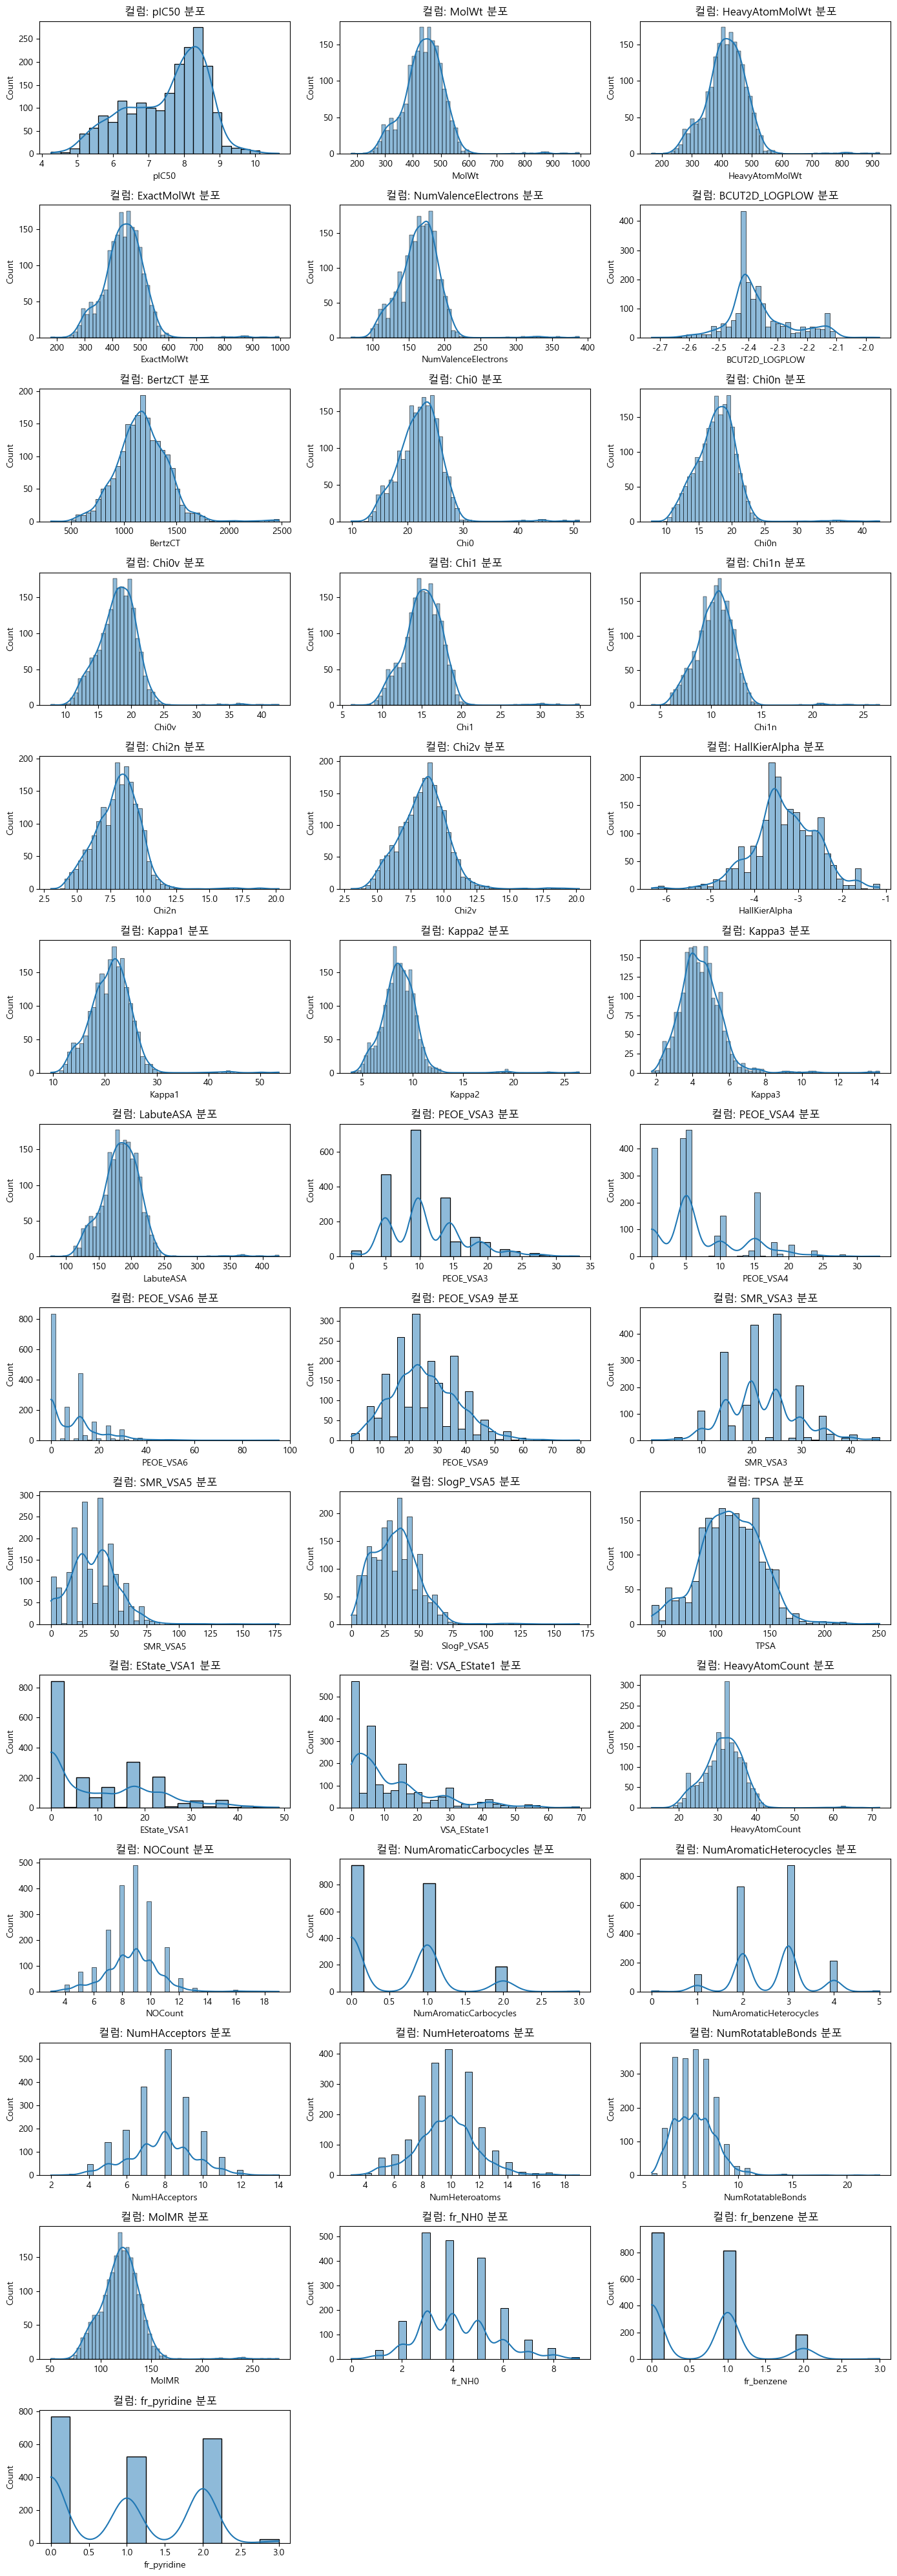

In [51]:
# 분포표 
plt.figure(figsize=(14, 40))
for i, col in enumerate(column_names_proto):
    plt.subplot(14, 3, i + 1)
    sns.histplot(pic50_corr_df[col], kde=True)
    plt.title(f'컬럼: {col} 분포')
plt.tight_layout()
plt.show()

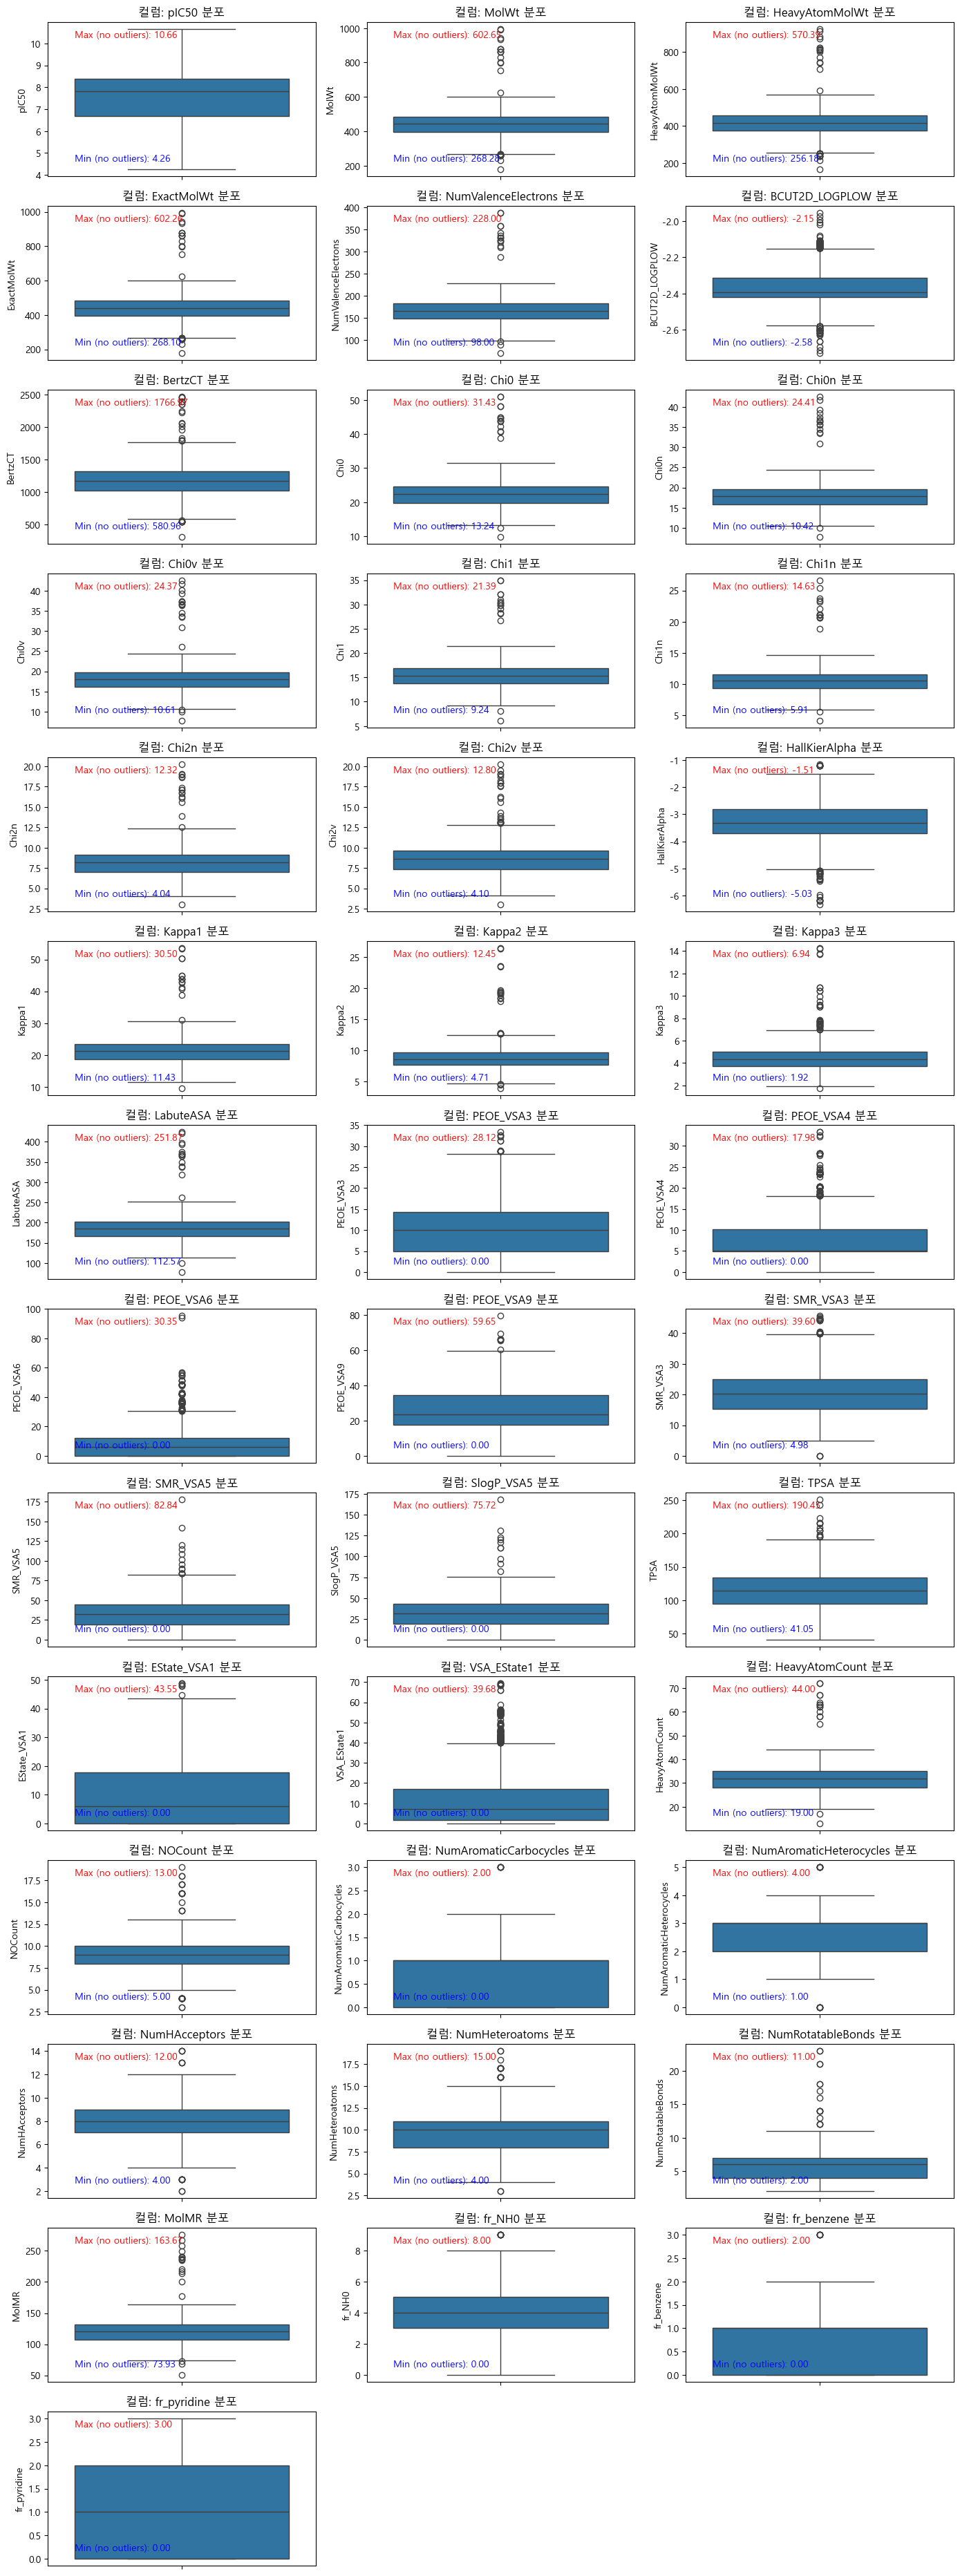

In [52]:
# 분포표 
plt.figure(figsize=(14, 40))
for i, col in enumerate(column_names_proto):
    plt.subplot(15, 3, i + 1)
    
    # 박스 플롯의 데이터와 통계량 계산
    data = pic50_corr_df[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 이상치를 제외한 최대값과 최소값 계산
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    max_without_outliers = filtered_data.max()
    min_without_outliers = filtered_data.min()
    
    # 박스 플롯 생성
    sns.boxplot(y=data)
    
    # 최대값과 최소값을 텍스트로 표시
    plt.text(0.1, 0.9, f'Max (no outliers): {max_without_outliers:.2f}', 
             transform=plt.gca().transAxes, 
             fontsize=10, color='red')
    plt.text(0.1, 0.1, f'Min (no outliers): {min_without_outliers:.2f}', 
             transform=plt.gca().transAxes, 
             fontsize=10, color='blue')
    
    plt.title(f'컬럼: {col} 분포')
    
plt.tight_layout()
plt.show()

### 4. 이상치 제거 및 데이터 분석 2차

In [32]:
min_value = 268.28
max_value = 602.65

# 범위 바깥의 행 제거
pic50_corr_df_filtered = pic50_corr_df[(pic50_corr_df['MolWt'] >= min_value) & (pic50_corr_df['MolWt'] <= max_value)]

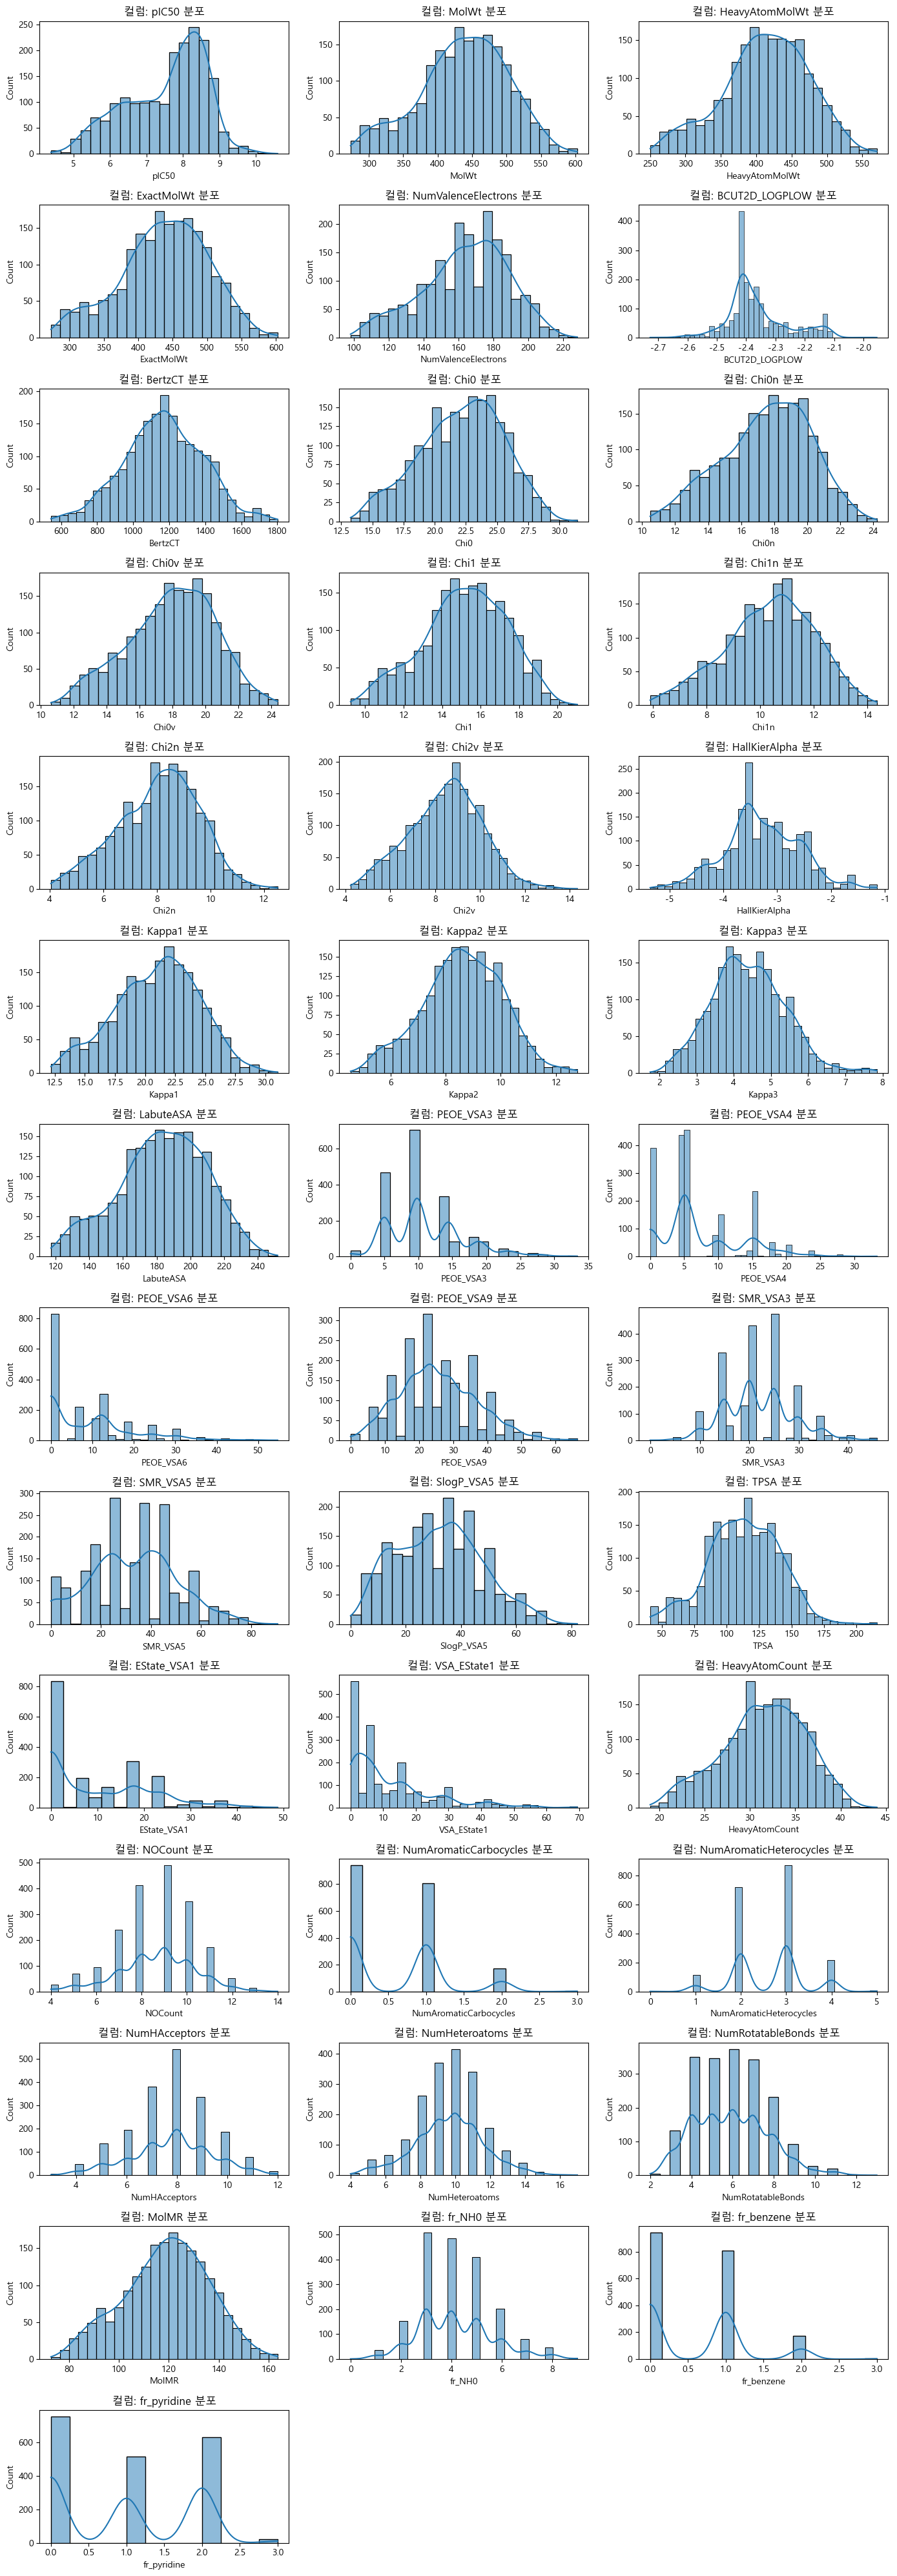

In [54]:
# 분포표 
plt.figure(figsize=(14, 40))
for i, col in enumerate(column_names):
    plt.subplot(14, 3, i + 1)
    sns.histplot(pic50_corr_df_filtered[col], kde=True)
    plt.title(f'컬럼: {col} 분포')
plt.tight_layout()
plt.show()

In [33]:
correlation_matrix = pic50_corr_df_filtered.corr()
abs_correlation_matrix = correlation_matrix.abs()
filtered_correlation_matrix_3 = abs_correlation_matrix.where(abs_correlation_matrix >= 0.3)
pic50_correlation_3 = filtered_correlation_matrix_3['pIC50']
pic50_correlation_3 = pic50_correlation_3.dropna()
pic50_correlation_3

pIC50                      1.000000
MolWt                      0.419513
HeavyAtomMolWt             0.412494
ExactMolWt                 0.419980
NumValenceElectrons        0.463139
BCUT2D_LOGPLOW             0.426004
BertzCT                    0.387467
Chi0                       0.490421
Chi0n                      0.472446
Chi0v                      0.427981
Chi1                       0.412116
Chi1n                      0.388970
Chi2n                      0.458627
Chi2v                      0.350919
HallKierAlpha              0.370152
Kappa1                     0.492431
Kappa2                     0.379200
Kappa3                     0.431100
LabuteASA                  0.419531
PEOE_VSA3                  0.370370
PEOE_VSA4                  0.334272
PEOE_VSA6                  0.353034
PEOE_VSA9                  0.300762
SMR_VSA3                   0.433778
SMR_VSA5                   0.427869
SlogP_VSA5                 0.427292
TPSA                       0.375597
EState_VSA1                0

In [34]:
filtered_correlation_matrix_4 = abs_correlation_matrix.where(abs_correlation_matrix >= 0.4)
pic50_correlation_4 = filtered_correlation_matrix_4['pIC50']
pic50_correlation_4 = pic50_correlation_4.dropna()
pic50_correlation_4

pIC50                      1.000000
MolWt                      0.419513
HeavyAtomMolWt             0.412494
ExactMolWt                 0.419980
NumValenceElectrons        0.463139
BCUT2D_LOGPLOW             0.426004
Chi0                       0.490421
Chi0n                      0.472446
Chi0v                      0.427981
Chi1                       0.412116
Chi2n                      0.458627
Kappa1                     0.492431
Kappa3                     0.431100
LabuteASA                  0.419531
SMR_VSA3                   0.433778
SMR_VSA5                   0.427869
SlogP_VSA5                 0.427292
HeavyAtomCount             0.447626
NOCount                    0.400814
NumAromaticCarbocycles     0.433181
NumAromaticHeterocycles    0.419041
NumHeteroatoms             0.420478
NumRotatableBonds          0.405546
fr_NH0                     0.404266
fr_benzene                 0.433181
fr_pyridine                0.454141
Name: pIC50, dtype: float64

In [35]:
filtered_correlation_matrix_45 = abs_correlation_matrix.where(abs_correlation_matrix >= 0.45)
pic50_correlation_45 = filtered_correlation_matrix_45['pIC50']
pic50_correlation_45 = pic50_correlation_45.dropna()
pic50_correlation_45

pIC50                  1.000000
NumValenceElectrons    0.463139
Chi0                   0.490421
Chi0n                  0.472446
Chi2n                  0.458627
Kappa1                 0.492431
fr_pyridine            0.454141
Name: pIC50, dtype: float64

### 5. 데이터 분석 완료 및 최종 데이터 csv 파일 저장

In [36]:
column_names_3 = pic50_correlation_3.index.tolist()
column_names_4 = pic50_correlation_4.index.tolist()
column_names_45 = pic50_correlation_45.index.tolist()

In [45]:
test_column_names_3 = [name for name in pic50_correlation_3.index.tolist() if name != 'pIC50']
test_column_names_4 = [name for name in pic50_correlation_4.index.tolist() if name != 'pIC50']
test_column_names_45 = [name for name in pic50_correlation_45.index.tolist() if name != 'pIC50']

In [46]:
train_final_3 = pic50_corr_df_filtered[column_names_3]
train_final_4 = pic50_corr_df_filtered[column_names_4]
train_final_45 = pic50_corr_df_filtered[column_names_45]

In [47]:
test_final_3 = test_df_proto[test_column_names_3]
test_final_4 = test_df_proto[test_column_names_4]
test_final_45 = test_df_proto[test_column_names_45]

In [48]:
train_final_3.to_csv('rdkit_train_corr_0.3.csv', index=False)
test_final_3.to_csv('rdkit_test_corr_0.3.csv', index=False)
train_final_4.to_csv('rdkit_train_corr_0.4.csv', index=False)
test_final_4.to_csv('rdkit_test_corr_0.4.csv', index=False)
train_final_45.to_csv('rdkit_train_corr_0.45.csv', index=False)
test_final_45.to_csv('rdkit_test_corr_0.45.csv', index=False)